<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#1df-Meta-Analysis-for-HIV-Acquisition:-Cross-Ancestry-&amp;-Eur-Specific" data-toc-modified-id="1df-Meta-Analysis-for-HIV-Acquisition:-Cross-Ancestry-&amp;-Eur-Specific-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1df Meta-Analysis for HIV Acquisition: Cross-Ancestry &amp; Eur-Specific</a></span><ul class="toc-item"><li><span><a href="#Download-Data-&amp;-Create-Directory-Structure" data-toc-modified-id="Download-Data-&amp;-Create-Directory-Structure-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Download Data &amp; Create Directory Structure</a></span></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#McLaren" data-toc-modified-id="McLaren-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>McLaren</a></span><ul class="toc-item"><li><span><a href="#Combine-Chromosome-Chunks" data-toc-modified-id="Combine-Chromosome-Chunks-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Combine Chromosome Chunks</a></span></li><li><span><a href="#Recode-Indels" data-toc-modified-id="Recode-Indels-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>Recode Indels</a></span></li><li><span><a href="#Rename-SNPs-to-1KG-Phase-3-format" data-toc-modified-id="Rename-SNPs-to-1KG-Phase-3-format-1.2.1.3"><span class="toc-item-num">1.2.1.3&nbsp;&nbsp;</span>Rename SNPs to 1KG Phase 3 format</a></span></li><li><span><a href="#Remove-outliers" data-toc-modified-id="Remove-outliers-1.2.1.4"><span class="toc-item-num">1.2.1.4&nbsp;&nbsp;</span>Remove outliers</a></span></li><li><span><a href="#Odds-Ratio-to-Beta-&amp;-Flip-Beta" data-toc-modified-id="Odds-Ratio-to-Beta-&amp;-Flip-Beta-1.2.1.5"><span class="toc-item-num">1.2.1.5&nbsp;&nbsp;</span>Odds Ratio to Beta &amp; Flip Beta</a></span></li></ul></li><li><span><a href="#In-house-meta-analyses" data-toc-modified-id="In-house-meta-analyses-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>In-house meta-analyses</a></span></li><li><span><a href="#WIHS" data-toc-modified-id="WIHS-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>WIHS</a></span><ul class="toc-item"><li><span><a href="#rename-headers" data-toc-modified-id="rename-headers-1.2.3.1"><span class="toc-item-num">1.2.3.1&nbsp;&nbsp;</span>rename headers</a></span></li></ul></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#cross-ancestry" data-toc-modified-id="cross-ancestry-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>cross-ancestry</a></span></li><li><span><a href="#EA-specific" data-toc-modified-id="EA-specific-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>EA-specific</a></span></li></ul></li><li><span><a href="#Code" data-toc-modified-id="Code-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Code</a></span><ul class="toc-item"><li><span><a href="#Cross-Ancestry" data-toc-modified-id="Cross-Ancestry-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Cross-Ancestry</a></span></li><li><span><a href="#EA-Specific" data-toc-modified-id="EA-Specific-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>EA-Specific</a></span></li><li><span><a href="#Secondary-scripts" data-toc-modified-id="Secondary-scripts-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Secondary scripts</a></span></li><li><span><a href="#merge_metal" data-toc-modified-id="merge_metal-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>merge_metal</a></span></li><li><span><a href="#qsub_metal_v2.sh" data-toc-modified-id="qsub_metal_v2.sh-1.4.5"><span class="toc-item-num">1.4.5&nbsp;&nbsp;</span>qsub_metal_v2.sh</a></span></li></ul></li></ul></li></ul></div>

#  1df Meta-Analysis for HIV Acquisition: Cross-Ancestry & Eur-Specific
**Author:** Jesse Marks <br>
**Results**: The results of this meta-analysis will be stored on AWS S3 at: `s3:///rti-hiv/meta_new/022`<br>
**GitHub Issue:** [#97](https://github.com/RTIInternational/bioinformatics/issues/97) <br>
**Data Location:** 
   * `s3://rti-uploads/paul.mclaren/icgh_aquisition_results.tar`
   * `s3://rti-hiv/hiv_uhs1234/results/1df/{aa,ea}/final/stats/`
   * `s3://rti-hiv/vidus/results/1df/final`
   * `s3://rti-hiv/wihs1_data/gwas/{aa,ea,ha}/MIS_results`
   * `s3://rti-hiv/wihs2_data/results/201410_1kg/chr*.aa.status~snp+ageatbl+EV.maf_gt_0.01_rsq_gt_0.30`

This notebook documents the steps taken to perform two baseline (1df) meta-analyses for HIV acquisition. The meta-analyses will be a cross-ancestry (021) and also an Eur-specific (022). These meta-analyses extend our previous in-house meta-analyses—the cross-ancestry meta015 as well as the Eur-specific meta016—by adding the McLaren GWAS results. The new cross-ancestry meta-analysis (021) will then include the following cohorts: 
* McLaren Eur (n=13,581)
* UHS1–4 Eur (n=3,013)
* UHS1–4 Afr (n=4,015)
* VIDUS Eur (n=931)
* WIHS1 Afr (n=2,009)
* WIHS1 Eur (n=720)
* WIHS1 Amr (n=356)
* WIHS2 Afr (n=844)

See [this GitHub comment](https://github.com/RTIInternational/bioinformatics/issues/97#issuecomment-506728280) in GitHub Issue 97 for the N counts of each sample. The new Eur-specific meta-analysis (022) will include the Eur cohorts from that list.

**Note** we applied GC to McLaren results only.

## Download Data & Create Directory Structure

In [ ]:
baseD=/shared/jmarks/proj/hiv/meta

## Create directory structure then download data over to respective directories
mkdir -p $baseD/data/mclaren/ea/
#mkdir -p $baseD/data/uhs1234/1df/{ea,aa}
#mkdir -p $baseD/data/wihs1/{ea,aa}
#mkdir -p $baseD/data/wihs2/aa
#mkdir -p $baseD/data/vidus/1df/ea
mkdir -p $baseD/data/015/
mkdir -p $baseD/data/016/

## Download from S3

# McLaren
cd $baseD/data/mclaren/ea
aws s3 cp s3://rti-uploads/paul.mclaren/icgh_aquisition_results.tar .
    
# Meta015
cd $baseD/data/015/
aws s3 sync s3://rti-hiv/meta_new/015/results/stats/exclude_singletons/ . --quiet &
gunzip * &

# Meta016
cd $baseD/data/016/
aws s3 sync s3://rti-hiv/meta_new/016/results/stats/exclude_singletons/ . --quiet &
gunzip * &

## UHS1-4
#cd $baseD/data/uhs1234/1df/ea
#aws s3 sync s3://rti-hiv/hiv_uhs1234/results/1df/ea/final/stats/ .
#gunzip * &
#cd $baseD/data/uhs1234/1df/aa
#aws s3 sync s3://rti-hiv/hiv_uhs1234/results/1df/aa/final/stats/ .
#gunzip * &
#
## VIDUS
#cd $baseD/data/vidus/1df/ea/
#aws s3 sync s3://rti-hiv/vidus/results/1df/final/ .
#gunzip * &
#
## WIHS1
#cd $baseD/data/wihs1/aa/
#aws s3 sync s3://rti-hiv/wihs1_data/gwas/aa/MIS_results .
#cd $baseD/data/wihs1/ea/
#aws s3 sync s3://rti-hiv/wihs1_data/gwas/ea/MIS_results .
#cd $baseD/data/wihs1/ha/
#aws s3 sync s3://rti-hiv/wihs1_data/gwas/ha/MIS_results .
#    
## WIHS2
#cd $baseD/data/wihs2/aa
#aws s3 sync s3://rti-hiv/wihs2_data/gwas/aa/MIS_results .

## Data Wrangling
Process the McLaren data to be compatible with the other data formats.

### McLaren
#### Combine Chromosome Chunks
Combine the chromosome chunks and also edit the header to be consistent with the headers from the other cohorts' results. <br>

**We need to map:**
```
CHR	chrom
BP	position
SNP	name
P	p
A1	A1
A2	A2
OR	beta_SNP_addA1
SE  sebeta_SNP_addA1
```

In [ ]:
cd $baseD/data/mclaren/ea
## extract files
tar -xf icgh_aquisition_results.tar
rm *tar

## copy head
zcat dan_chr22_015_018.assoc.dosage.meta.ngt.metadaner.gz | head -1 > head.txt

## edit header with vim to match the headers we need
vim head.txt
    
for chr in {1..22}; do
    cat head.txt > dan_chr${chr}_assoc_dosage_meta_ngt_metadaner.txt
    for file in dan_chr${chr}_*.assoc.dosage.meta.ngt.metadaner.gz; do
        zcat $file | tail -n +2 >> dan_chr${chr}_assoc_dosage_meta_ngt_metadaner.txt
    done
done &

## clean up directory
rm *gz
rm head.txt

#### Recode Indels
The indels are of the form:
`10      10_2626351      2626351 I2      D `

and we recode the to the form:
`10      10_2626351      2626351 AT      A`

We do this using the position information and the UHS1–4 coding. The `D` coding corresponds to the deletion portion (the smallest string) and the `I#` coding corresponds to the insertion portion (the longest string).

In [ ]:
### python3 ###
"""
indel_recoding.py

Recode McLaren indels to the same format as the idel coding in the UHS1–4 results files.
"""

for chrom in range(1,23):
    # use the UHS1–4 GWAS results files as the reference for how indels should be coded
    ref = "/shared/jmarks/proj/hiv/meta/data/uhs1234/1df/ea/uhs1234.ea.1df.1000G_p3.chr{}.HIV_ACQ~SNP+AGE+SEX+PC1+PC9+PC10.maf_gt_0.01_subject+eur.rsq_gt_0.30.stats".format(chrom)
    infile = "dan_chr{}_assoc_dosage_meta_ngt_metadaner.txt".format(chrom)
    outfile = "dan_chr{}_assoc_dosage_meta_ngt_metadaner_indel_reformatted.stats".format(chrom)

    with open(ref) as refF, open(infile) as inF, open(outfile, "w") as outF:
        ref_head = refF.readline()
        line = refF.readline()

        # keep a dictionary with position (key) -> [a1,a2] list (value) 
        # of all UHS1-4 variants
        position_dic = {}
        while line:
            sl = line.split()
            pos = sl[2]
            a1 = sl[3]
            a2 = sl[4]
            position_dic[pos] = [a1, a2]
            line = refF.readline()

        # begin processing McLaren results
        dan_head = inF.readline()
        outF.write(dan_head)
        dan_line = inF.readline()
        while dan_line:
            dl = dan_line.split()
            pos = dl[2]
            a1 = dl[3]
            a2 = dl[4]

            ## if a1 is the deletion, and the indel is in UHS1-4, 
            ## then assign a1 to shortest string sequence in UHS1-4 (the deletion portion),
            ## and a2 to the longest (insertion portion)
            if a1 == "D":
                if pos in position_dic:
                    indel_list = position_dic[pos]
                    a1 = min(indel_list, key=len)
                    a2 = max(indel_list, key=len)
                    dl[3] = a1
                    dl[4] = a2
                    newline = "\t".join(dl)
                    newline += "\n"
                    outF.write(newline)

            ## same idea except now a2 is the deletion portion and a1 is insertion
            elif a2 == "D":
                if pos in position_dic:
                    indel_list = position_dic[pos]
                    a2 = min(indel_list, key=len)
                    a1 = max(indel_list, key=len)
                    dl[3] = a1
                    dl[4] = a2
                    newline = "\t".join(dl)
                    newline += "\n"
                    outF.write(newline)

            ## if variant was not an indel, just write to file
            else:
                newline = "\t".join(dl)
                newline += "\n"
                outF.write(newline)

            dan_line = inF.readline()

#### Rename SNPs to 1KG Phase 3 format

In [ ]:
mcD=/shared/jmarks/proj/hiv/meta/data/mclaren/ea/original
for chr in {1..22}; do
    docker run -v $mcD:/data/mcD/ \
               -v /shared/data/ref_panels/1000G/2014.10:/data/legends/ \
    rticode/convert_to_1000g_ids:fe710d550c9ff0d100d0b7c37db580362488e8fc \
        /opt/code_docker_lib/convert_to_1000g_ids.pl \
            --file_in /data/mcD/dan_chr${chr}_assoc_dosage_meta_ngt_metadaner_indel_reformatted.stats \
            --file_out /data/mcD/dan_chr${chr}_assoc_dosage_meta_ngt_metadaner_indel_reformatted_1000g_p3.stats \
            --legend /data/legends/1000GP_Phase3_chr$chr.legend.gz \
            --file_in_header 1 \
            --file_in_id_col 1 \
            --file_in_chr_col 0 \
            --file_in_pos_col 2 \
            --file_in_a1_col 3 \
            --file_in_a2_col 4 \
            --chr $chr
done

#### Remove outliers
We are removing from these meta results any SNPs that:
* not available in all six cohorts
* MAF < 1%
* RSQ (info) < 0.8

In [ ]:
# python3 script
"""
Script to remove SNPs that don't meet our filtering criterion
* MAF < 1%
* RSQ < 0.8
* SNPs not available in all six cohorts (not that usually we simply remove singletons,
    however in the published McLaren data they applied this particular filter)
"""

for chrom in range(1,23):
    infile = "dan_chr{}_assoc_dosage_meta_ngt_metadaner_indel_reformatted_1000g_p3.stats".format(chrom)
    outfile = "dan_chr{}_assoc_dosage_meta_ngt_metadaner_indel_reformatted_1000g_p3_maf_rsq_in_all.stats".format(chrom)
    
    index1 = head.index("FRQ_A_6334") # # FRQ_A_6334 - A1 Frequency in 6,334 HIV infected individuals
    index2 =  head.index("FRQ_U_7247") # FRQ_U_7247 - A1 Frequency in 7,247 population controls
    rsq_index = firstLine.split().index("INFO")

    with open(infile) as inF, open(outfile, 'w') as outF:
        print("Processing chromosome " + str(chrom) + "...")
        firstLine = inF.readline()
        outF.write(firstLine)
        line = inF.readline()
        while(line):
            tmp = line.split()
            if(sum([d != "?" for d in tmp[12]]) == 6): # must be in all cohorts
                if (float(sl[index1]) > 0.99 or  # MAF > 1%
                    float(sl[index2]) > 0.99 or
                    float(sl[index1]) < 0.01 or
                    float(sl[index2]) < 0.01):
                    pass
                elif float(tmp[rsq_index]) >= 0.8:  # RSQ > 0.8
                    outF.write(line)
                else:
                    pass
            line = inF.readline()

#### Odds Ratio to Beta & Flip Beta
Convert odds ratio to beta coefficient and also flip the beta-coefficient so that the A2 allele is the effect allele. This will make it consistent with the coding of the other cohorts.
`calculate_beta.py`

**Note**: The standard error provided in the McLaren summary statistics is given in terms of lg(OR). So it would be the standard error of beta-coefficient and therefore it was unnecessary for us to recalculate it. 

In [ ]:
### python ###
"""
Convert odds ratio to beta-coefficient and flipped the sign of the beta-coefficient
so that the A2 allele is the affect allele.
"""

import numpy as np
from scipy.stats import norm


for chrom in range(1,23):
    message = "Processing chr{}".format(chrom)

    infile = "dan_chr{}_assoc_dosage_meta_ngt_metadaner_indel_reformatted_1000g_p3_maf_rsq_in_all.stats".format(chrom)
    outfile = "chr{}.mclaren.hiv_acq.indel_recoded.beta_flipped.maf_0.01.rsq_0.8.in_all_cohorts.1kg_p3.stats".format(chrom)

    with open(infile) as inF, open(outfile, "w") as outF:
        head = inF.readline()
        beta_index = head.split().index("beta_SNP_addA1") # index of odds ratio (what we replace with beta)
        p_index = head.split().index("p")
        outF.write(head)
        line = inF.readline()

        while line:
            sl = line.split()

            sl[beta_index] = np.log(float(sl[beta_index])) # beta = ln(OR)
            sl[beta_index] = str(-sl[beta_index]) # flip sign

            newline = "\t".join(sl)
            outF.write(newline + "\n")
            line = inF.readline()

### In-house meta-analyses
Filter down to only the necessary fields—not the cohort-specific-results fields.

Also edit header to have the field names:
```
name chrom position A1 A2 beta_SNP_addA1 sebeta_SNP_addA1 p Direction HetISq HetChiSq HetDf HetPVal
```

In [ ]:
for file in *; do 
    pre=${file::-4}
    ext=${file: -3}
    new=${pre}_filtered.${ext}
    cut -d " " -f 1-13 $file > $new
done &

### WIHS
**Note**: Since we did not use the individual GWAS summary statistics for this meta-analysis, we did not actually end up having to rename the headers. 

#### rename headers
Currently we have for all of the WIHS data,
```
id chrom position A1 A2 Freq1 MAF Quality Rsq n Mean_predictor_allele beta_SNP_addA1 sebeta_SNP_addA1 chi2_SNP_add chi p or_95_percent_ci
```

But we need the `id` variable to be named `name`.

In [ ]:
#cd /shared/jmarks/proj/hiv/meta/data/wihs1
#head -1 aa/chr8.aa.status~snp+ageatbl+EV.maf_gt_0.01_rsq_gt_0.30 > head.txt
#
## WIHS1
#for chr in {1..22}; do
#    cat head.txt <(tail -n +2 aa/chr$chr.aa.status~snp+ageatbl+EV.maf_gt_0.01_rsq_gt_0.30) >\
#        aa/chr$chr.aa.status~snp+ageatbl+EV.maf_gt_0.01_rsq_gt_0.30_renamed.stats
#    cat head.txt <(tail -n +2 ea/chr$chr.ea.status~snp+ageatbl+EV.maf_gt_0.01_rsq_gt_0.30) >\
#        ea/chr$chr.ea.status~snp+ageatbl+EV.maf_gt_0.01_rsq_gt_0.30_renamed.stats
#    cat head.txt <(tail -n +2 ha/chr$chr.ha.status~snp+ageatbl+EV.maf_gt_0.01_rsq_gt_0.30) >\
#        ha/chr$chr.ha.status~snp+ageatbl+EV.maf_gt_0.01_rsq_gt_0.30_renamed.stats
#done &
#
#cd /shared/jmarks/proj/hiv/meta/data/wihs2
#head -1 aa/chr3.aa.status~snp+ageatbl+EV.maf_gt_0.01_rsq_gt_0.30 > head.txt
#
## WIHS2
#for chr in {1..22}; do
#    cat head.txt <(tail -n +2 aa/chr$chr.aa.status~snp+ageatbl+EV.maf_gt_0.01_rsq_gt_0.30) >\
#        aa/chr$chr.aa.status~snp+ageatbl+EV.maf_gt_0.01_rsq_gt_0.30_renamed.stats
#done &

## Results

### cross-ancestry

In [1]:
from IPython.display import Image
#man = Image(filename='C://Users/jmarks/OneDrive - Research Triangle Institute/Projects/HIV/meta/021/hiv_acquisition_cross_ancestry_1df_meta_analysis_mclaren_ea+meta015.exclude_singletons.1df.snps+indels.manhattan.png') 
#qq = Image(filename='C://Users/jmarks/OneDrive - Research Triangle Institute/Projects/HIV/meta/021/hiv_acquisition_cross_ancestry_1df_meta_analysis_mclaren_ea+meta015.exclude_singletons.1df.snps+indels.qq.png') 
#display(man, qq)

### EA-specific
With Genomic Control applied to individual level data as well as meta-analyis results.

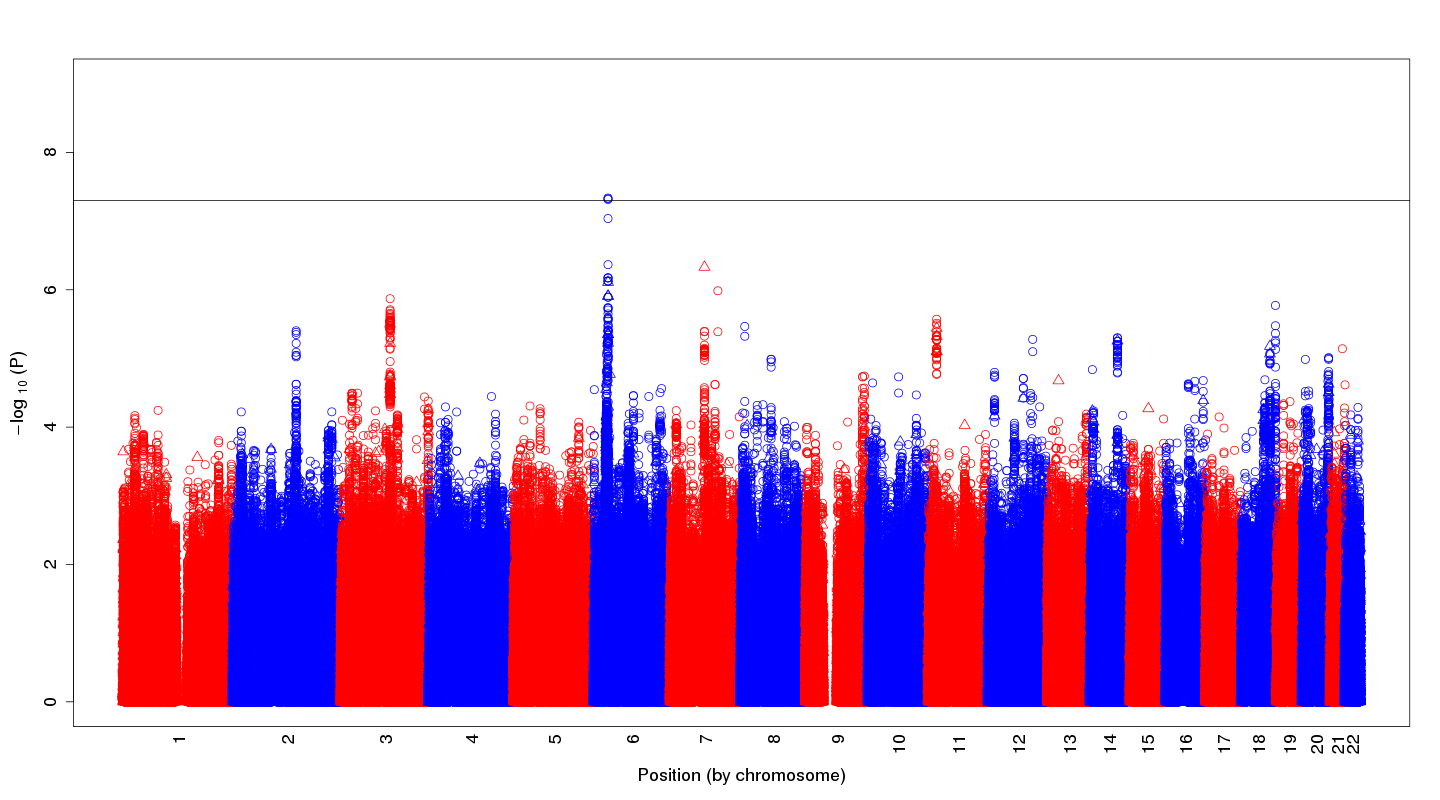

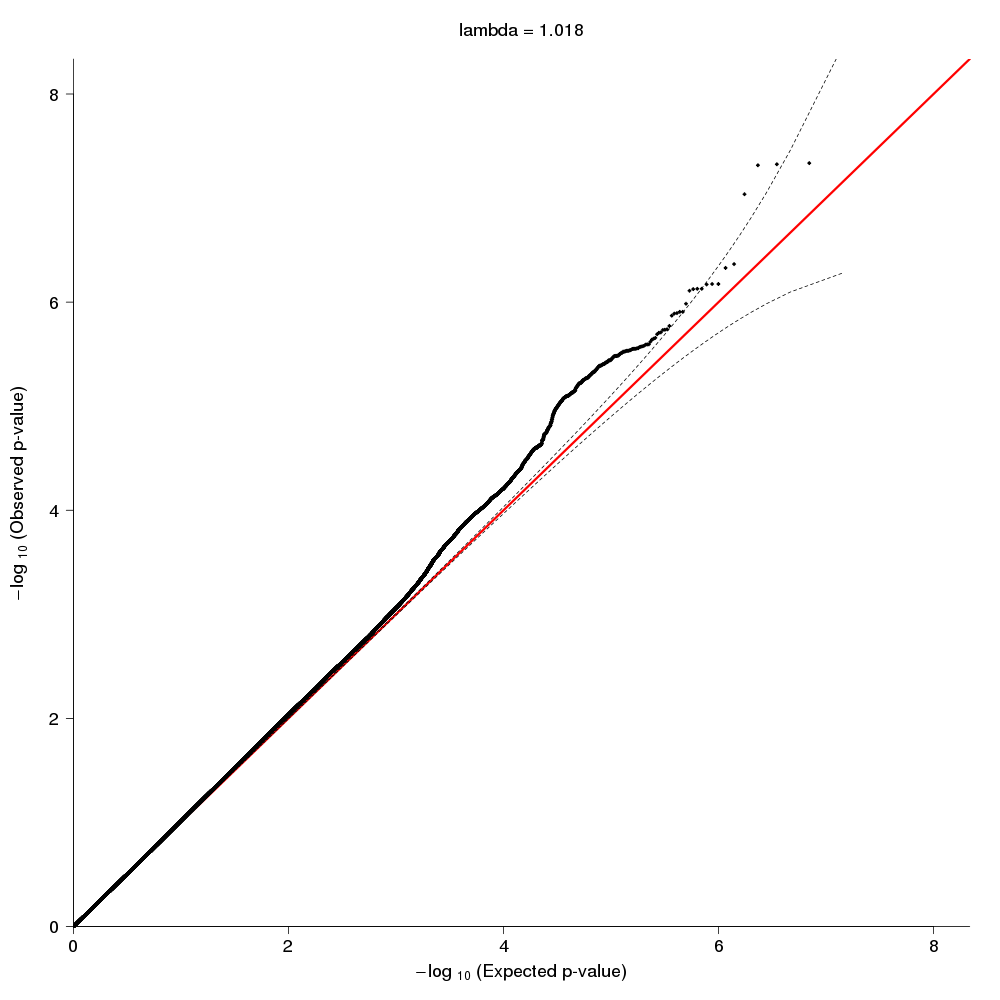

In [2]:
from IPython.display import Image
man = Image(filename='C://Users/jmarks/OneDrive - Research Triangle Institute/Projects/HIV/meta/022/v05/hiv_acq_eur_1df_meta_analysis_mclaren_meta016_exclude_singletons.snps+indels.manhattan.png')
qq = Image(filename='C://Users/jmarks/OneDrive - Research Triangle Institute/Projects/HIV/meta/022/v05/hiv_acq_eur_1df_meta_analysis_mclaren_meta016_exclude_singletons.snps+indels.qq.png')
display(man, qq)

## Code
Below are the methods to perform the meta-analysis in the AWS environment. The code needs to be ran sequentially and cannot be run all at once. You must patiently wait for one section of code to run before performing the next. The main parts that need modified are the paths to the cohorts' data at the beginning and at the R section towards the end that sorts the top p-values. There is also a python section in the middle that is performed to exclude singletons which needs to be modified to reflect the correct paths.

The main purpose of this methods file is to perform a meta-analysis with the software tool METAL and then produce the Manhattan and QQ plots from this meta-analysis.

### Cross-Ancestry

### EA-Specific

In [ ]:
## HIV acquisition meta-analysis
## Our in-house meta results (016) + McLaren meta-analysis
## We apply GC to the McLaren results
##
## Author: Jesse Marks
## Date: 20190923


df="1df" # degrees of freedom (1df or 2df)
study="mclaren_meta016" # prepended to results files and for directory structure
study_num=022
version="v05"
gcList="mclaren_eur" # function name of the study(s) for which to apply GC to. if none leave ""
gcTwice="no"
filePrefix="hiv_acq_eur_${df}_meta_analysis_${study}"
outDir="/shared/jmarks/proj/hiv/meta/results/${study_num}/$version"
dataDir="/shared/jmarks/proj/hiv/meta/data"
minchr=1  # first chr in sequence
maxchr=22  # last chr in sequence

mkdir -p $outDir/{processing,final}

# functions to create cohort paths. arg1="base/directory/path" arg2="chromosome#"
mclaren_eur() { echo $1/mclaren/eur/chr$2.mclaren.hiv_acq.indel_recoded.beta_flipped.maf_0.01.rsq_0.8.in_all_cohorts.1kg_p3.stats ;}
#meta015() { echo $1/015/hiv_acquisition_1df_meta_analysis_uhs1-4_aa+uhs1-4_ea+vidus_ea+wihs1_aa+wihs1_ea+wihs1_ha+wihs2_aa.chr$2.exclude_singletons_filtered.1df ;}
meta016() { echo $1/016/hiv_acquisition_1df_meta_analysis_uhs1-4_ea+vidus_ea+wihs1_ea.chr$2.exclude_singletons_filtered.1df ;}


##NOTE, the following code is for personal use only. use with discretion
cohortLabels=""
for function in $(compgen -A function);do
    cohortLabels+=$(echo ${function^^})
    cohortLabels+=" "
done
# remove "MODULE" function
echo $cohortLabels
cohortLabels=${cohortLabels//"MODULE"}
echo $cohortLabels

# the cohort labels below were retrieved from running the loop above
# should be ALL CAPS list of function names
cohortLabels="MCLAREN_EUR META016"
########################################################################################################################

if [ $df == "1df" ];then
    pv="p"
    std="STDERR"
elif [ $df == "2df" ]; then
    pv="p_2df"
    std="INTERACTION"
fi

### START METAL analysis ###

# loop for filling in the METAL parameters
for (( chr=${minchr}; chr<=${maxchr}; chr++)); do
    my_string=""
    for cohort in ${cohortLabels}; do
        if [[ $gcList !=  *"${cohort,,}"* ]]; then # if cohort not in GC list
            string_fun() { echo "--PROCESS" $(${cohort,,} $1 $2); }
            my_string+=$(string_fun $dataDir $chr)
            my_string+=" "
        fi
    done
    
    if [ ${#gcList} != 0 ]; then # if there are cohorts to apply GC to
        my_string+="--GENOMICCONTROL ON  "
        for cohort in ${gcList}; do
            string_fun() { echo "--PROCESS" $(${cohort,,} $1 $2); }
            my_string+=$(string_fun $dataDir $chr)
            my_string+=" "
        done 
    fi

    bash ~/bin/qsub_metal.sh \
        --SCHEME $std \
        --PVALUE $pv \
        --MARKER name \
        --ALLELE A1 A2 \
        --EFFECT beta_SNP_addA1 \
        --STDERR sebeta_SNP_addA1 \
        --GENOMICCONTROL OFF \
        ${my_string} \
        --OUTFILE $outDir/processing/${filePrefix}.chr$chr.$df .metal \
        --ANALYZE HETEROGENEITY \
        --script_prefix $outDir/processing/${filePrefix}.chr$chr.$df \
        --mem 3.8 \
        --priority 0
done 

################################################################################
## remove singleton SNP/indels (snps founnd in only one cohort) ###
# python script
python

minchr = 1 # starting chr
maxchr = 23 # ending chr plus 1
study = "mclaren_eur+meta016" # prepended to results files and for directory structure
df = "1df"
filePrefix = "hiv_acquisition_eur_specific_{}_meta_analysis_{}_gc_applied".format(df, study)
outDir = "/shared/jmarks/proj/hiv/meta/results/022/v04/processing/"

for chrom in range(minchr,maxchr):
    print("Processing chromosome " + str(chrom) + "...")
    inF = open(outDir + filePrefix + ".chr" + str(chrom) + "." + df + ".metal", "r")
    outF = open(outDir + filePrefix + "_exclude_singletons.chr" + str(chrom) + ".metal", "w")
    firstLine = inF.readline()
    outF.write(firstLine)
    line = inF.readline()
    while(line):
        tmp = line.split()
        if(sum([d != "?" for d in tmp[6]]) > 1):
            outF.write(line)
        line = inF.readline()
    inF.close()
    outF.close()
## end python script
################################################################################


## apply GC to meta results ##
if [ $gcTwice == "yes" ]; then
    newPrefix=${filePrefix}_twice_exclude_singletons

    # START METAL analysis #
    for (( chr=${minchr}; chr<=${maxchr}; chr++)); do
        bash ~/bin/qsub_metal.sh \
            --SCHEME STDERR \
            --PVALUE P-value \
            --MARKER MarkerName \
            --ALLELE Allele1 Allele2 \
            --EFFECT Effect \
            --STDERR StdErr \
            --GENOMICCONTROL ${genomic_control} \
            --PROCESS $outDir/processing/${filePrefix}_exclude_singletons.chr$chr.metal \
            --OUTFILE $outDir/processing/${newPrefix}.chr$chr .metal \
            --ANALYZE HETEROGENEITY \
            --script_prefix $outDir/processing/${newPrefix}.chr$chr \
            --mem 3.8 \
            --priority 0
    done

    filePrefix=$newPrefix
fi


## START Merge ProbABEL and METAL results ###
for (( chr=${minchr}; chr<=${maxchr}; chr++ )); do
    my_string=""
    for cohort in ${cohortLabels};do
        string_fun() { echo $(${cohort,,} $1 $2); }
        my_string+=$(string_fun $dataDir $chr)
        my_string+=" "
    done

  /shared/bioinformatics/software/scripts/qsub_job.sh \
    --job_name merge_meta_${chr} \
    --script_prefix $outDir/processing/${filePrefix}.chr$chr \
    --mem 10 \
    --nslots 2 \
    --priority 0 \
    --program python ~/bin/merge_probabel_metal_v02.py \
        --metal $outDir/processing/${filePrefix}.chr$chr.metal \
        --probabel \
        ${my_string} \
        --probabel_labels ${cohortLabels} \
        --out $outDir/final/${filePrefix}.chr$chr
done
### END Merge ProbABEL and METAL results ###

# Check for completion (should return/print out nothing)
for (( chr=${minchr}; chr<=${maxchr}; chr++ )); do
  file=$outDir/processing/${filePrefix}.chr$chr.qsub.log
  if [ -f $file ]
  then
    logLineCount=$(wc -l $file | perl -lane 'print $F[0];')
    if [ $logLineCount -eq 0 ]; then
      echo $file empty
    else
      tail -n 1 $file |
        perl -ne 'chomp; if (!/Done$/) { print "'$file'\n".$_."\n"; }'
    fi
  else
    echo $file missing
  fi
done


### START Generate plots ###
# create SNP table for input to plotting script
outFile=$outDir/processing/${filePrefix}.table
echo -e "VARIANT_ID\tCHR\tPOSITION\tP\tTYPE" > $outFile
for (( chr=${minchr}; chr<=${maxchr}; chr++ )); do
    inFile=$outDir/final/${filePrefix}.chr$chr
    echo Processing $inFile
    tail -n +2 $inFile |
    perl -lne '/^(\S+)\s+(\S+)\s+(\S+)\s+(\S+)\s+(\S+)\s+\S+\s+\S+\s+(\S+)/;
                if (($4 eq "a" || $4 eq "c" || $4 eq "g" || $4 eq "t") && ($5 eq "a" || $5 eq "c" || $5 eq "g" || $5 eq "t")) {
                  print join("\t",$1,$2,$3,$6,"snp");
                } else {
                  print join("\t",$1,$2,$3,$6,"indel");
                }' >> $outFile
done


# generate plots
/shared/bioinformatics/software/scripts/qsub_job.sh \
    --job_name gwas_plots \
    --script_prefix $outDir/processing/${filePrefix}.plots \
    --mem 10 \
    --nslots 3 \
    --priority 0 \
    --program Rscript /shared/bioinformatics/software/R/generate_gwas_plots.R \
    --in $outDir/processing/${filePrefix}.table \
    --in_chromosomes autosomal_nonPAR \
    --in_header \
    --out $outDir/final/${filePrefix}\
    --col_id VARIANT_ID \
    --col_chromosome CHR \
    --col_position POSITION \
    --col_p P \
    --col_variant_type TYPE \
    --generate_snp_indel_manhattan_plot \
    --manhattan_odd_chr_color red \
    --manhattan_even_chr_color blue \
    --manhattan_points_cex 1.5 \
    --manhattan_cex_lab 1.5 \
    --manhattan_cex_axis 1.5 \
    --generate_snp_indel_qq_plot \
    --qq_lines \
    --qq_points_bg black \
    --qq_lambda

## plot with ylim
#/shared/bioinformatics/software/scripts/qsub_job.sh \
#  --job_name gwas_plots_no_singletons_ylim \
#  --script_prefix $outDir/processing/${filePrefix}.exclude_singletons.ylim_9.plots \
#  --mem 10 \
#  --nslots 3 \
#  --priority 0 \
#  --program Rscript /shared/bioinformatics/software/R/generate_gwas_plots.R \
#  --in $outDir/processing/${filePrefix}.exclude_singletons.table \
#  --in_chromosomes autosomal_nonPAR \
#  --in_header \
#  --out $outDir/processing/${filePrefix}.exclude_singletons.ylim_9 \
#  --col_id VARIANT_ID \
#  --col_chromosome CHR \
#  --col_position POSITION \
#  --col_p P \
#  --col_variant_type TYPE \
#  --generate_snp_indel_manhattan_plot \
#  --manhattan_odd_chr_color red \
#  --manhattan_even_chr_color blue \
#  --manhattan_points_cex 1.5 \
#  --manhattan_cex_lab 1.5 \
#  --manhattan_cex_axis 1.5 \
#  --generate_snp_indel_qq_plot \
#  --qq_lines \
#  --qq_points_bg black \
#  --qq_lambda \
#  --manhattan_ylim 9
### END Generate plots ###



### START Filter by p-value  < 0.001 ###
outFile=$outDir/processing/${filePrefix}.p_lte_0.001
head -n 1 $outDir/final/${filePrefix}.chr22 > $outFile
for (( chr=${minchr}; chr<=${maxchr}; chr++ )); do
  inFile=$outDir/final/${filePrefix}.chr$chr
  echo Processing $inFile
  tail -n +2 $inFile |
    perl -lane 'if ($F[7] <= 0.001) { print; }' >> $outFile
done
### end p-value filtering ###


### Sort p-value filtered file (Rscript) ###
R
df <- "1df"
outDir <- "/shared/jmarks/proj/hiv/meta/results/022/v04"
study <- "mclaren_ea+meta016_gc_applied_twice_exclude_singletons" # prepended to results files and for directory structure
filePrefix <- paste("hiv_acquisition_eur_specific_", df, "_meta_analysis_", study, sep="")
inData <- read.table(paste(sep="", outDir, "/processing/", filePrefix, ".p_lte_0.001"), header = TRUE)
outData <- inData[order(inData$P.value),]
write.csv(outData, file=paste(sep="", outDir, "/final/", filePrefix, ".p_lte_0.001.csv"), row.names = FALSE, quote=FALSE)
### END Filter by p-value ###




####################################################################################################
### Create FUMA file ###
# Chr 
# Position
# MarkerName
# P-value
# Allele1
# Allele2
# Effect
# StdErr

#MarkerName chr position Allele1 Allele2 Effect StdErr P-value Direction HetISq HetChiSq HetDf HetPVal
base_dir=$outDir/final

in_file() {
echo $1/hiv_acquisition_1df_meta_analysis_uhs1-4_aa+uhs1-4_ea+vidus_ea+wihs1_aa+wihs1_ea+wihs1_ha+wihs2_aa.chr$2.exclude_singletons.1df;
 }
outfile=$base_dir/hiv_acquisition_1df_meta_analysis_uhs1-4_aa+uhs1-4_ea+vidus_ea+wihs1_aa+wihs1_ea+wihs1_ha+wihs2_aa.exclude_singletons.ALL_CHR.FUMA
echo $(in_file $base_dir 1)

# print header to file
awk '{print $1,$2,$3,$4,$5,$6,$7,$8;exit}'\
    $(in_file $base_dir 1) > $outfile
for (( chr=${minchr}; chr<=${maxchr}; chr++ )); do
    echo processing chr$chr
    awk 'NR>=2{print $1,$2,$3,$4,$5,$6,$7,$8}'\
     $(in_file $base_dir $chr) >> $outfile
done

### End FUMA creation ###

### Secondary scripts
These were scripts called in the methods file above.

### merge_metal

In [ ]:
### merge_metal script ###
import gzip, sys, os, operator

# function parses input arguments
# required arguments: --metal
#                                        --probabel
#                                        --probabel_labels
#                                        --out
def parseArguments(args):
        while(len(args) > 0):
                # input metal file name (full path)
                if(args[0] == '--metal'):
                        metalFName = args[1]
                        args = args[2:]

                # a list of input probabel file names (full path)
                elif(args[0] == '--probabel'):
                        args = args[1:]
                        probabelFList = []
                        while(len(args)>0 and args[0][:2] != '--'):
                                probabelFList.append(args[0])
                                args = args[1:]

                # a list of probabel labels
                elif(args[0] == '--probabel_labels'):
                        args = args[1:]
                        labelsList = []
                        while(len(args)>0 and args[0][:2] != '--'):
                                labelsList.append(args[0])
                                args = args[1:]

                # output merged file name (full path)
                elif(args[0] == '--out'):
                        outFName = args[1]
                        args = args[2:]

                # other arguments unused
                else:
                        sys.exit('Unused arguments: ' + ' '.join(args))

        # check if missing required arguments
        if('metalFName' not in locals() or 'probabelFList' not in locals() or 'labelsList' not in locals() or 'outFName' not in locals()):
                sys.exit('Missing at least one required argument. Please specify --metal, --probabel, --probabel_labels, --out')

        # check if length of probabel files equals length of probabel labels
        if(len(probabelFList) != len(labelsList)):
                sys.exit('Length of probabel files does not match length of probabel labels.')

        return (metalFName, outFName, probabelFList, labelsList)

# function sort the input probabel file by position
def maybeSort(fname):
        if(fname[-7:] == '.sorted'):
                return fname
        else:
                # check if a sorted file is available
                if(os.path.exists(fname + '.sorted')):
                        print 'Using already sorted file: ' + fname + '.sorted'
                        return fname + '.sorted'
                #if(os.path.exists(fname + '.sorted.gz')):
                #       os.system('rm ' + fname + '.sorted.gz')
                # sort by position
                inF = open(fname, 'r')
                header = inF.readline().split()
                if('position' in header):
                        posIndex = str(header.index('position') + 1)
                elif('pos' in header):
                        posIndex = str(header.index('pos') + 1)
                print 'Sorting file: ' + fname
                cmd = 'sort -k' + posIndex + 'n,' + posIndex + ' ' + fname + ' > ' + fname + '.sorted'
                os.system(cmd)
                return fname + '.sorted'

# one marker represents a row,
# use .output() function to write to file
class Marker:
        def __init__(self, line):
                tmp = line.split()
                self.name = tmp[0]
                self.chr = '.'
                self.pos = '.'
                self.content = tmp[1:]
                self.length = len(self.content)

        def addChrPos(self, line, chrIndex, posIndex):
                tmp = line.split()
                newChr = tmp[chrIndex]
                newPos = tmp[posIndex]

                if(self.chr == '.'):
                        self.chr = newChr
                elif(self.chr != newChr):
                        print('Chromosome for marker ' + self.name + ' does not match.')

                if(self.pos == '.'):
                        self.pos = newPos
                elif(self.pos != newPos):
                        print('Position for marker ' + self.name + ' does not match.')

        def output(self):
                return(' '.join([self.name, self.chr, self.pos]) + ' ' + ' '.join(self.content))
# extract chr and pos information from probabel file, save to metalDict
def extractNameChrPos(metalDict, probabelFName):
        probabelF = open(probabelFName, 'r')
        header = probabelF.readline().split()

        nameIndex = -1
        chrIndex = -1
        posIndex = -1

        if('name' in header):
                nameIndex = header.index('name')
        elif('marker_name' in header):
                nameIndex = header.index('marker_name')
        elif('markername' in header):
                nameIndex = header.index('markername')

        if('chrom' in header):
                chrIndex = header.index('chrom')
        elif('chr' in header):
                chrIndex = header.index('chr')

        if('position' in header):
                posIndex = header.index('position')
        elif('pos' in header):
                posIndex = header.index('pos')

        if(nameIndex == -1 or chrIndex == -1 or posIndex == -1):
                print probabelFName
                print header

        tmpSet = set()
        for line in probabelF.readlines():
                tmp = line.split()
                tmpSet.add(tmp[nameIndex])
                if(metalDict.get(tmp[nameIndex], 'NA') == 'NA'):
                        continue
                metalDict[tmp[nameIndex]].addChrPos(line, chrIndex, posIndex)
        probabelF.close()
        return tmpSet

# add metal content to dictionary
def addMetalToDict(d, fname):
        if(fname[-2:] == 'gz'):
                inF = gzip.open(fname, 'r')
        else:
                inF = open(fname, 'r')
        markerP = {}
        header = inF.readline()
        pIndex = header.split().index('P-value')

        for line in inF.readlines():
                tmp = line.split()
                marker = tmp[0]
                d[marker] = Marker(line)
                markerP[marker] = float(tmp[pIndex])

        inF.close()

        return markerP

# function extract header from probabel files
def extractHeaders(probabelStream):
        headers = []
        for i in range(len(probabelStream)):
                headers.append(probabelStream[i].readline())
        return headers

# function construct header from metal files and probabel files
def constructHeader(metalFName, probabelHeaders, labelsList):
        if(metalFName[-2:] == 'gz'):
                metalF = gzip.open(metalFName, 'r')
        else:
                metalF = open(metalFName, 'r')
        header = metalF.readline().split()
        header.insert(1, 'position')
        header.insert(1, 'chr')
        metalF.close()

        for i in range(len(labelsList)):
                tmp = probabelHeaders[i].split()
                for t in tmp:
                        if(t not in ['name', 'marker_name', 'markername', 'chrom', 'chr', 'position', 'pos']):
                                header.append(t + '.' + labelsList[i])
        return ' '.join(header)

# extract marker name index and position index from header
def extractNameIndexPosIndex(probabelHeaders):
        nameIndex = []
        posIndex = []
        lengths = []
        for header in probabelHeaders:
                tmp = header.split()
                if('name' in tmp):
                        nameIndex.append(tmp.index('name'))
                elif('marker_name' in tmp):
                        nameIndex.append(tmp.index('marker_name'))
                elif('markername' in tmp):
                        nameIndex.append(tmp.index('markername'))
                else:
                        nameIndex.append(-1)
                if('position' in tmp):
                        posIndex.append(tmp.index('position'))
                elif('pos' in tmp):
                        posIndex.append(tmp.index('pos'))
                else:
                        posIndex.append(-1)
                lengths.append(len(tmp) - posIndex[-1] - 1)
        return (nameIndex, posIndex, lengths)

def processThisMarker(markerName, metalDict, probabelStream, markerNames, buffer, probabelHeaders):
        nameIndex, posIndex, lengths = extractNameIndexPosIndex(probabelHeaders)
        # content from metal
        thisMarker = metalDict[markerName]
        line = thisMarker.output() # metal content added
        for i in range(len(probabelStream)):
                if(thisMarker.name in markerNames[i]):
                        # first check buffer
                        if(buffer[i].get(thisMarker.name, 'NA') != 'NA'):
                                line = line + ' ' + ' '.join(buffer[i][thisMarker.name])
                                del buffer[i][thisMarker.name]
                        # not in buffer, then read in from stream
                        else:
                                newLine = probabelStream[i].readline()
                                tmp = newLine.split()
                                # if the next element is not the one looking for, deposite in buffer
                                while(newLine and tmp[nameIndex[i]] != thisMarker.name):
                                        buffer[i][tmp[nameIndex[i]]] = tmp[posIndex[i]+1:]
                                        newLine = probabelStream[i].readline()
                                        tmp = newLine.split()

                                # now this is the marker
                                line = line + ' ' + ' '.join(tmp[posIndex[i]+1:])
                else:
                        for j in range(lengths[i]):
                                line = line + ' NA'
        return line

def checkOutput(outFName):
        with open(outFName) as outF:
                header = outF.readline()
                headerLength = len(header.split())
                line = outF.readline()
                while(line):
                        if(len(line.split()) != headerLength):
                                return "Fail"
                        line = outF.readline()
                return "Succeed"

# the main function
if __name__ == "__main__":
        metalFName, outFName, probabelFList, labelsList = parseArguments(sys.argv[1:])

        for i in range(len(probabelFList)):
                probabelFList[i] = maybeSort(probabelFList[i])

        # read in metal file
        # construct a dictionary to hold all metal results
        # key is the marker name, value is a Marker class object
        metalDict = {}
        markerP = addMetalToDict(metalDict, metalFName) # markerP - meta analyses p-value

        # first loop through all probabel files to add chr and position information
        # at the same time, keep a record of all marker names
        markerNames = []
        for probabelFName in probabelFList:
                tmpSet = extractNameChrPos(metalDict, probabelFName)
                markerNames.append(tmpSet)

        # sort marker by position
        markerPos = {}
        for m in metalDict.keys():
                try:
                        markerPos[m] = int(metalDict[m].pos)
                except Exception:
                        pass
        sortedMarker = sorted(markerPos.items(), key=operator.itemgetter(1))

        # loop through all probabel files second times
        # this time, keep the input stream
        probabelStream = []
        for probabelFName in probabelFList:
                probabelStream.append(open(probabelFName))

        # first pass - create the output file
        # header - first line from stream read
        outF = open(outFName, 'w')
        probabelHeaders = extractHeaders(probabelStream)
        outF.write(constructHeader(metalFName, probabelHeaders, labelsList) + '\n')

        # content - read subsequent lines
 # a buffer stores markers that are out of order
        buffer = []
        for i in probabelHeaders:
                buffer.append({})
        for m in sortedMarker:
                line = processThisMarker(m[0], metalDict, probabelStream, markerNames, buffer, probabelHeaders)
                outF.write(line + '\n')

        outF.close()

        # check output number of columns

        while(checkOutput(outFName) == 'Fail'):
                # header - first line from stream read
                outF = open(outFName, 'w')
                probabelHeaders = extractHeaders(probabelStream)
                outF.write(constructHeader(metalFName, probabelHeaders, labelsList) + '\n')

                # content - read subsequent lines
                # a buffer stores markers that are out of order
                buffer = []
                for i in probabelHeaders:
                        buffer.append({})
                for m in sortedMarker:
                        line = processThisMarker(m[0], metalDict, probabelStream, markerNames, buffer, probabelHeaders)
                        outF.write(line + '\n')

                outF.close()

        print 'Done'

### qsub_metal_v2.sh
I had to modify lines 70 and 71 to reflect the parallel processing (multi-threading) environment in the AWS environment - symmetric multiprocessing (smp)

In smp all of the cores act as one through the operating system. 

In [ ]:
#!/bin/sh

metalScript="#!/shared/bioinformatics/software/third_party/metal_v3.25.2011/bin/metal\n\n"
outFile=""
finalOutFile=""
scriptPrefix=""
mem=3.8
priority=0

while [ "$1" != "" ];
do
        if [ "$1" == "--MARKER" ] || [ "$1" == "--EFFECT" ] || [ "$1" == "--PVALUE" ] || [ "$1" == "--WEIGHT" ] || [ "$1" == "--GENOMICCONTROL" ] || [ "$1" == "--PROCESS" ] || [ "$1" == "--SCHEME" ] || [ "$1" == "--STDERR" ]; then
                metalScript=$metalScript$(echo $1 | sed 's/--//')" "$2"\n"
                shift
        elif [ "$1" == "--ALLELE" ] || [ "$1" == "--OUTFILE" ]; then
                metalScript=$metalScript$(echo $1 | sed 's/--//')" "$2" "$3"\n"
                if [ "$1" == "--OUTFILE" ]; then
                        outFile=$2"1"$3
                        finalOutFile=$2$3
                fi
                shift
                shift
        elif [ "$1" == "--ANALYZE" ]; then
                if [ "$2" == "HETEROGENEITY" ]; then
                        metalScript=$metalScript"ANALYZE HETEROGENEITY\n"
                        shift
                else
                        metalScript=$metalScript"ANALYZE\n"
                fi
        else
                case $1 in
                        --script_prefix )                       shift
                                                                                scriptPrefix=$1
                                                                                ;;
                        --mem )                                         shift
                                                                                mem=$1
                                                                                ;;
                        --priority )                            shift
                                                                                priority=$1
                                                                                ;;
                esac
        fi
        shift
done
metalScript=$metalScript"QUIT\n"
fileMetalScript=$scriptPrefix".metal.sh"
echo -e $metalScript > $fileMetalScript
chmod 775 $fileMetalScript

fileQsubScript=$scriptPrefix".metal.qsub.sh"
fileQsubScriptLog=$scriptPrefix".metal.qsub.log"
fileQsubScriptError=$scriptPrefix".metal.qsub.error"
echo \#$ -S /bin/bash > $fileQsubScript
echo \#$ -v LD_LIBRARY_PATH >> $fileQsubScript
echo \#  >> $fileQsubScript
echo \# >> $fileQsubScript
echo \#$ -l h_rt=600:00:00  >> $fileQsubScript
echo \# >> $fileQsubScript
echo \# >> $fileQsubScript
echo \# Job name  >> $fileQsubScript
echo \#$ -N METAL >> $fileQsubScript
echo \# >> $fileQsubScript
echo \# Use current working directory >> $fileQsubScript
echo \#$ -cwd >> $fileQsubScript
echo \# >> $fileQsubScript
echo \# Join stdout and stderr >> $fileQsubScript
echo \#$ -j y >> $fileQsubScript
echo \# >> $fileQsubScript
echo \# pe request for MPICH2. Set your number of processors here.  >> $fileQsubScript
echo \# SMP stands for "Shared Memory Jobs" >> $fileQsubScript
echo \#$ -pe smp 1 >> $fileQsubScript
echo \# >> $fileQsubScript
echo \# Run job through bash shell >> $fileQsubScript
echo \#$ -S /bin/bash >> $fileQsubScript
echo \# >> $fileQsubScript
echo \# The following is for reporting only. It is not really needed >> $fileQsubScript
echo \# to run the job. It will show up in your output file. >> $fileQsubScript
echo echo \"Got \$NSLOTS processors.\" >> $fileQsubScript
echo $fileMetalScript >> $fileQsubScript
echo mv $outFile $finalOutFile >> $fileQsubScript
echo mv $outFile.info $finalOutFile.info >> $fileQsubScript

chmod 775 $fileQsubScript

vmem=`echo "$mem + 2" | bc`

qsub -q all.q -l mem_free=${mem}G,h_vmem=${vmem}G,h_rt=24:00:00 -p $priority -o $fileQsubScriptLog -e $fileQsubScriptError $fileQsubScript
